In [46]:
import pandas as pd
from deep_learning_at_scale.chapter_11.mnist import IndexedMNIST
from pathlib import Path
import matplotlib.pyplot as plt

In [49]:
mnist = IndexedMNIST(Path("/tmp/"), train=True, download=True)

df = pd.read_csv(
    "../../.tmp/output/chapter_11/train/chapter_11_1690052228341710000/sample_wise_stats"
)
df.sample_index = df.sample_index.astype(int)
df.epoch = df.epoch.astype(int)
df.preds = df.preds.astype(int)

In [76]:
total_epoch = 10
loss_df = df.pivot(index="sample_index", columns="epoch")["loss"]
forgotten_df = ((loss_df.diff(axis=1) >= 0) * 1).sum(axis="columns")
always_forgotten = loss_df[(forgotten_df == 7)]
most_learnable_samples = loss_df[
    (((loss_df.diff(axis=1) >= 0) * 1).sum(axis="columns") < 2)
]

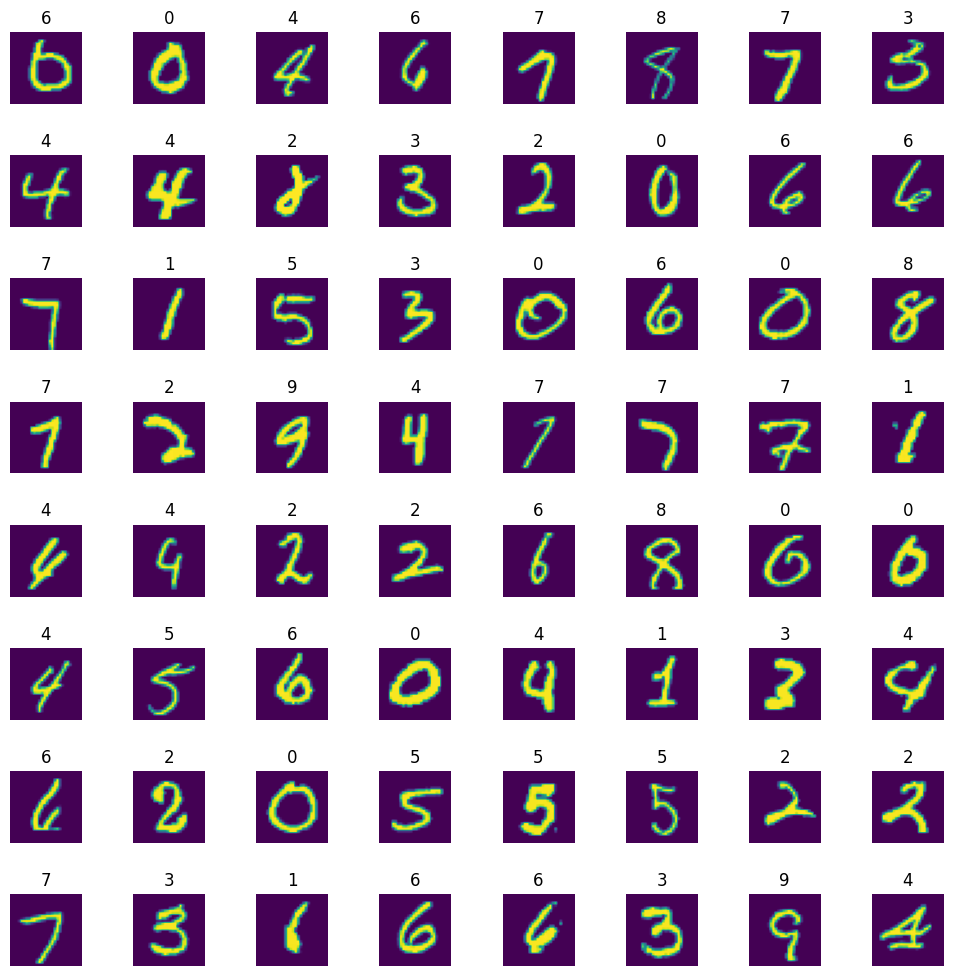

In [87]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 10))
fig.tight_layout()
for idx, sample_ix in enumerate(list(always_forgotten.index)):
    if idx == 64:
        break
    _, img, y = mnist[sample_ix]
    axes[idx // 8, idx % 8].imshow(img)
    axes[idx // 8, idx % 8].title.set_text(y)
    axes[idx // 8, idx % 8].set_axis_off()

<Axes: xlabel='epoch'>

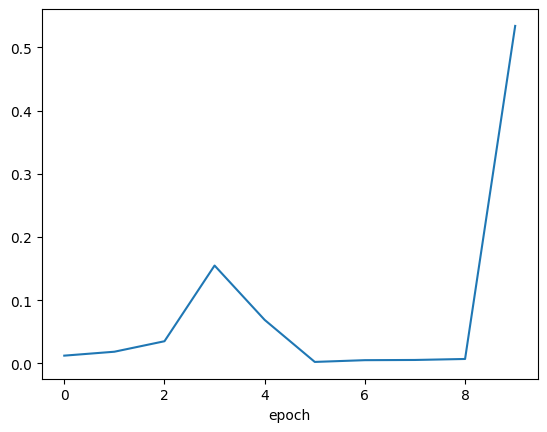

In [92]:
## Lets look at 11th example now ..
always_forgotten.iloc[11].plot()

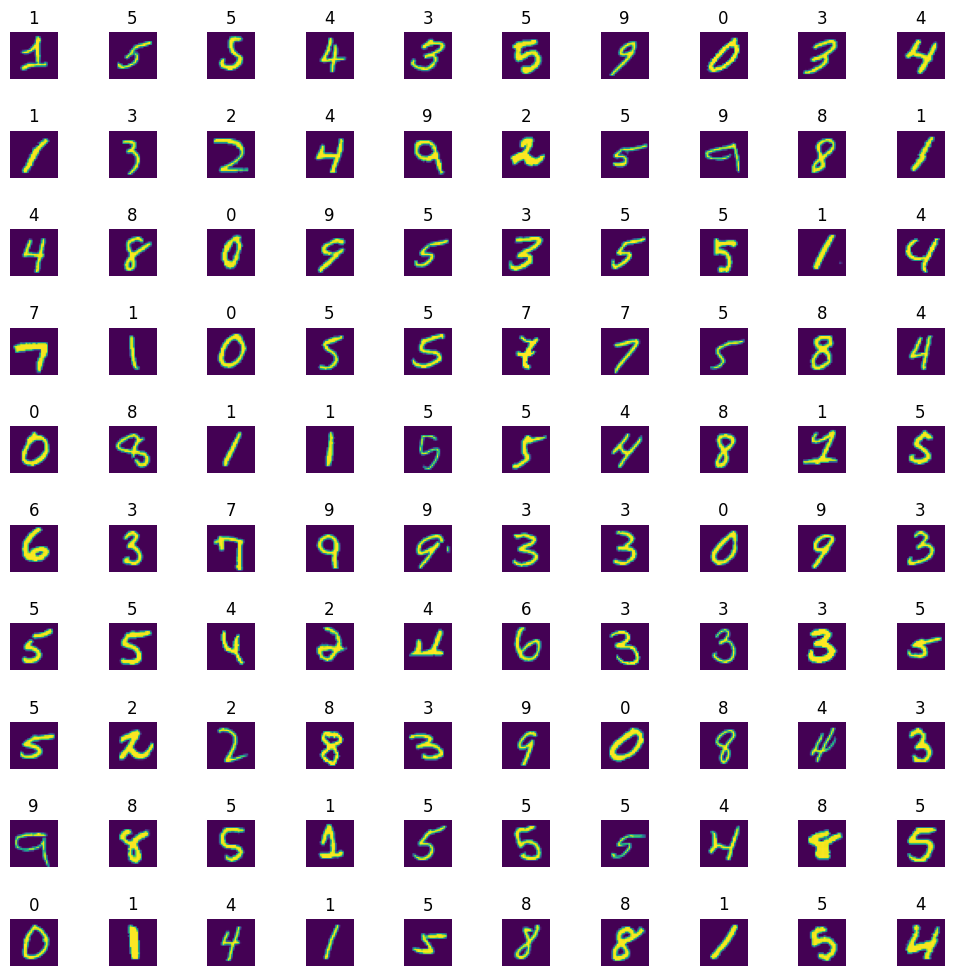

In [88]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
fig.tight_layout()
for idx, sample_ix in enumerate(list(most_learnable_samples.index)):
    if idx == 100:
        break
    _, img, y = mnist[sample_ix]
    axes[idx // 10, idx % 10].imshow(img)
    axes[idx // 10, idx % 10].title.set_text(y)
    axes[idx // 10, idx % 10].set_axis_off()

<Axes: xlabel='epoch'>

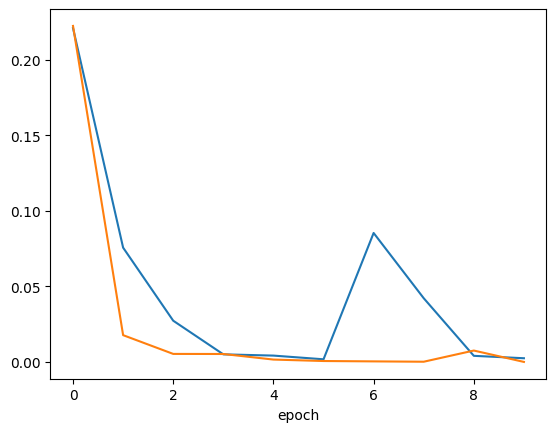

In [103]:
## Lets look at 88th example now ..
ax = most_learnable_samples.iloc[88].plot()
most_learnable_samples.iloc[81].plot(ax=ax)

<Axes: xlabel='epoch'>

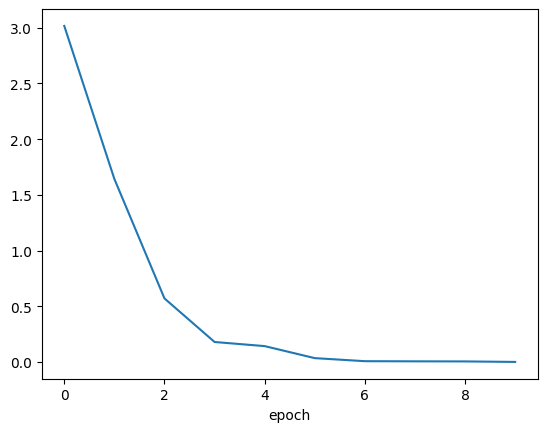

In [102]:
most_learnable_samples.loc[659].plot()  # sample index 659 is never forgotten actually

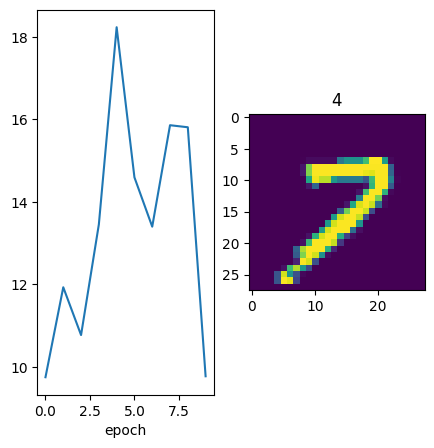

In [129]:
most_challenging_idx = 59915
loss_df[loss_df[loss_df > 17].sum(axis="columns") > 0]  # 59915

fig, axes = plt.subplots(ncols=2, figsize=(5, 5))
loss_df.loc[most_challenging_idx].plot(
    ax=axes[0]
)  # sample index 659 is never forgotten actually
_, img, y = mnist[most_challenging_idx]
axes[1].imshow(img)
axes[1].title.set_text(y)

## Grad score

<Axes: ylabel='Frequency'>

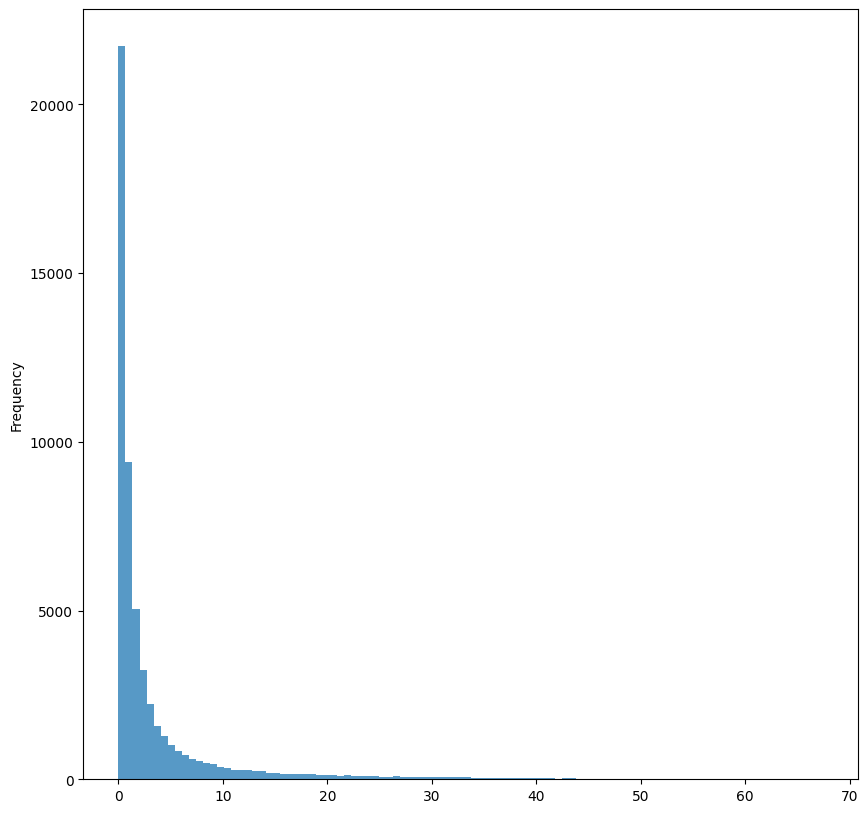

In [143]:
dd_df = pd.read_csv(
    "../../.tmp/output/chapter_11/train/chapter_11_1690081353415642000/data_diet.csv"
)
dd_df.sample_index = dd_df.sample_index.astype(int)
dd_df.drop(columns="Unnamed: 0", inplace=True)
# dd_df.set_index("sample_index", inplace=True)
dd_df.epoch = dd_df.epoch.astype(int)
# dd_df.preds = dd_df.preds.astype(int)

grad_score_df = dd_df.pivot(index="sample_index", columns="epoch")["grad_score"]
grad_score_df.mean(axis="columns").plot(
    kind="hist", figsize=(10, 10), rot=0, alpha=0.75, logy=False, bins=100
)

In [148]:
high_grad_score = grad_score_df.mean(axis="columns").sort_values().tail(100)

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
fig.tight_layout()
for idx, sample_ix in enumerate(list(high_grad_score.index)):
    if idx == 100:
        break
    _, img, y = mnist[sample_ix]
    axes[idx // 10, idx % 10].imshow(img)
    axes[idx // 10, idx % 10].title.set_text(y)
    axes[idx // 10, idx % 10].set_axis_off()

sample_index
46247    48.271384
55739    48.362669
13920    48.427994
11949    48.451627
30123    48.486784
           ...    
28491    61.851199
49889    62.515939
12679    63.224139
20735    67.043398
7851     67.446625
Length: 100, dtype: float64